<a href="https://colab.research.google.com/github/shreyaio/exploratory-data-analysis-project/blob/main/datacleaning_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Exploratory Data Analysis

**Author:** Shreya Shah  
**GitHub:** https://github.com/shreyaio  
**Date:** Jan 2026

# Airbnb Data Cleaning & Preprocessing

## Objective
This notebook performs a structured data cleaning and preprocessing pipeline on the Airbnb Open Dataset.
The goal is to transform raw, inconsistent data into an analysis-ready dataset suitable for EDA and ML tasks.


##1. Load Basic Structure

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/Airbnb_Open_Data.csv")

/tmp/ipython-input-3285050461.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Airbnb_Open_Data.csv")


In [ ]:
df.head()
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [ ]:
df.shape

(102599, 26)

## 2. Dataset Overview
Understanding the size, structure, and basic properties of the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
df.describe(include='all')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,1.025990e+05,102349,1.025990e+05,102310,102193,102570,102583,102591.000000,102591.000000,102067,...,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,50468,2
unique,NaN,61281,NaN,2,13190,7,224,NaN,NaN,1,...,231,NaN,NaN,2477,NaN,NaN,NaN,NaN,1976,1
top,NaN,Home away from home,NaN,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,United States,...,$41,NaN,NaN,6/23/2019,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,NaN,33,NaN,51200,881,43792,7937,NaN,NaN,102067,...,526,NaN,NaN,2443,NaN,NaN,NaN,NaN,2712,2
mean,2.914623e+07,NaN,4.925411e+10,NaN,NaN,NaN,NaN,40.728094,-73.949644,NaN,...,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254,NaN,NaN
std,1.625751e+07,NaN,2.853900e+10,NaN,NaN,NaN,NaN,0.055857,0.049521,NaN,...,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024,NaN,NaN
min,1.001254e+06,NaN,1.236005e+08,NaN,NaN,NaN,NaN,40.499790,-74.249840,NaN,...,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,1.508581e+07,NaN,2.458333e+10,NaN,NaN,NaN,NaN,40.688740,-73.982580,NaN,...,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000,NaN,NaN
50%,2.913660e+07,NaN,4.911774e+10,NaN,NaN,NaN,NaN,40.722290,-73.954440,NaN,...,NaN,3.000000,7.000000,NaN,0.740000,3.000000,1.000000,96.000000,NaN,NaN
75%,4.320120e+07,NaN,7.399650e+10,NaN,NaN,NaN,NaN,40.762760,-73.932350,NaN,...,NaN,5.000000,30.000000,NaN,2.000000,4.000000,2.000000,269.000000,NaN,NaN


In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

## 3. Check casing, spacing & messy column names

In [ ]:
# Display column names as a list to inspect formatting,
# casing, spacing, and naming inconsistencies

df.columns.tolist()


['id',
 'NAME',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'review rate number',
 'calculated host listings count',
 'availability 365',
 'house_rules',
 'license']

In [ ]:
# Standardize column names by:
# - removing leading/trailing spaces
# - converting to lowercase
# - replacing spaces with underscores

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

## 4. Check casing & formatting inside text columns

In [ ]:
df["room_type"].value_counts()


,count
room_type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


In [ ]:
df["instant_bookable"].unique()


array([False, True, nan], dtype=object)

In [ ]:
df["host_identity_verified"].unique()


array(['unconfirmed', 'verified', nan], dtype=object)

##5. Missing Values

In [ ]:
"""To Check for Missing values in all the columns"""
df.isna().sum()

,0
id,0
name,250
host_id,0
host_identity_verified,289
host_name,406
neighbourhood_group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
"""To check for the percentage of missing values in all the columns"""
(df.isna().sum() / len(df) * 100).sort_values(ascending=False)


,0
license,99.998051
house_rules,50.810437
last_review,15.490404
reviews_per_month,15.476759
country,0.518524
availability_365,0.436651
minimum_nights,0.398639
host_name,0.395715
review_rate_number,0.317742
calculated_host_listings_count,0.310919


##6. Duplicates

In [ ]:
"""To check number of duplicated rows"""
df.duplicated().sum()

np.int64(541)

In [ ]:
"""To show the duplicated rows"""
df[df.duplicated()]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [ ]:
df["id"].duplicated().sum()


np.int64(541)

##7. Basic Statistics

In [ ]:
#df.describe() generates summary statistics for numerical columns in the dataset.
#
# It shows:
# - count : number of non-missing (non-null) values in each column
# - mean  : average value of the column
# - std   : standard deviation, i.e., how spread out the values are
# - min   : smallest value in the column
# - 25%   : first quartile (Q1) – 25% of values are below this
# - 50%   : median – the middle value of the column
# - 75%   : third quartile (Q3) – 75% of values are below this
# - max   : largest value in the column

df.describe()

,id,host_id,lat,long,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [ ]:
# Generate summary statistics for categorical (object) columns.
# Shows count of non-null values, number of unique categories,
# the most frequent category (top), and its frequency (freq).
# Transpose (.T) is used to improve readability.


df.describe(include="object").T

,count,unique,top,freq
name,102349,61281,Home away from home,33
host_identity_verified,102310,2,unconfirmed,51200
host_name,102193,13190,Michael,881
neighbourhood_group,102570,7,Manhattan,43792
neighbourhood,102583,224,Bedford-Stuyvesant,7937
country,102067,1,United States,102067
country_code,102468,1,US,102468
instant_bookable,102494,2,False,51474
cancellation_policy,102523,3,moderate,34343
room_type,102599,4,Entire home/apt,53701


##8. Outlier Sanity Checks

In [ ]:
# Convert all values to string so .str methods work safely
df["price"] = df["price"].astype(str)

# Remove currency symbols and commas
df["price"] = (
    df["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Convert to numeric, coercing invalid values to NaN
df["price"] = pd.to_numeric(df["price"], errors="coerce")


In [ ]:
# Convert all values to string so .str methods work safely
df["service_fee"] = df["service_fee"].astype(str)

# Remove currency symbols and commas
df["service_fee"] = (
    df["service_fee"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Convert to numeric, coercing invalid values to NaN
df["service_fee"] = pd.to_numeric(df["service_fee"], errors="coerce")

In [ ]:
df.select_dtypes(include=["int64", "float64"]).drop(columns=["id"]).describe()


,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


##9. Date Columns Check

In [ ]:
pd.to_datetime(df["last_review"], errors="coerce").isna().sum()


np.int64(15893)

In [ ]:
df["last_review"].head(20)


,last_review
0,10/19/2021
1,5/21/2022
2,NaN
3,7/5/2019
4,11/19/2018
5,6/22/2019
6,10/5/2017
7,10/5/2017
8,6/24/2019
9,7/21/2017


##10. Remove duplicate listings (based on id)

In [ ]:
# --- Check for duplicate IDs ---
duplicate_id_count = df["id"].duplicated().sum()
print(f"Duplicate IDs found: {duplicate_id_count}")

# --- Remove duplicates if any exist ---
if duplicate_id_count > 0:
    rows_before = df.shape[0]

    df = df.drop_duplicates(subset="id", keep="first")

    rows_after = df.shape[0]
    print(f"Removed {rows_before - rows_after} duplicate rows.")
else:
    print("No duplicate IDs found. Skipping duplicate removal.")


Duplicate IDs found: 541
Removed 541 duplicate rows.


In [ ]:
# Confirm duplicates are gone
print("Remaining duplicate IDs:", df["id"].duplicated().sum())

Remaining duplicate IDs: 0


##11. Drop useless columns (license, house_rules)

In [ ]:
# --- Columns identified as useless for ML ---
columns_to_drop = ["license", "house_rules"]

# --- Check which of these columns actually exist ---
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# --- Drop columns if they exist ---
if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No specified columns found to drop.")


Dropped columns: ['license', 'house_rules']


In [ ]:
# Confirm columns are removed
print("Current columns:")
print(df.columns.tolist())

Current columns:
['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365']


##12. Data Type & Format Correction

In [ ]:
# --- Check current dtype ---
print("Before conversion:", df["last_review"].dtype)

# --- Convert to datetime safely ---
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")

# --- Check result ---
print("After conversion:", df["last_review"].dtype)

# --- Count missing values after conversion ---
print("NaT values in last_review:", df["last_review"].isna().sum())


Before conversion: object
After conversion: datetime64[ns]
NaT values in last_review: 15832


In [ ]:
# --- Columns to convert ---
currency_columns = ["price", "service_fee"]

for col in currency_columns:
    if col in df.columns:
        print(f"\nProcessing column: {col}")
        print("Before dtype:", df[col].dtype)

        print(f"Missing values in {col}:", df[col].isna().sum())


Processing column: price
Before dtype: float64
Missing values in price: 247

Processing column: service_fee
Before dtype: float64
Missing values in service_fee: 273


In [ ]:
# --- Check current dtype ---
print("Before dtype:", df["construction_year"].dtype)

# --- Convert to numeric safely ---
df["construction_year"] = pd.to_numeric(df["construction_year"], errors="coerce")

# --- Set invalid years to NaN ---
df.loc[
    (df["construction_year"] < 1800) | (df["construction_year"] > 2025),
    "construction_year"
] = np.nan

# --- Convert to nullable integer ---
df["construction_year"] = df["construction_year"].astype("Int64")

# --- Verify ---
print("After dtype:", df["construction_year"].dtype)
print("Missing values in construction_year:", df["construction_year"].isna().sum())


Before dtype: float64
After dtype: Int64
Missing values in construction_year: 214


In [ ]:
# Verify updated dtypes
df[["last_review", "price", "service_fee", "construction_year"]].dtypes


,0
last_review,datetime64[ns]
price,float64
service_fee,float64
construction_year,Int64


##13. Categorical Standardization

In [ ]:
# --- Identify categorical (object) columns ---
categorical_cols = df.select_dtypes(include="object").columns.tolist()
print(f"Categorical columns found: {categorical_cols}")

# --- Normalize text columns safely ---
for col in categorical_cols:
    # Count non-null values before
    non_null_before = df[col].notna().sum()

    # Normalize text: strip whitespace and lowercase
    df[col] = df[col].astype(str).str.strip().str.lower()

    # Restore NaN values (astype(str) turns NaN into 'nan')
    df.loc[df[col] == "nan", col] = np.nan

    non_null_after = df[col].notna().sum()
    print(f"{col}: normalized (non-null before={non_null_before}, after={non_null_after})")


Categorical columns found: ['name', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type']
name: normalized (non-null before=101808, after=101808)
host_identity_verified: normalized (non-null before=101769, after=101769)
host_name: normalized (non-null before=101654, after=101646)
neighbourhood_group: normalized (non-null before=102029, after=102029)
neighbourhood: normalized (non-null before=102042, after=102042)
country: normalized (non-null before=101526, after=101526)
country_code: normalized (non-null before=101927, after=101927)
instant_bookable: normalized (non-null before=101953, after=101953)
cancellation_policy: normalized (non-null before=101982, after=101982)
room_type: normalized (non-null before=102058, after=102058)


In [ ]:
print("instant_bookable unique values:", df["instant_bookable"].unique())
print("host_identity_verified unique values:", df["host_identity_verified"].unique())


instant_bookable unique values: ['false' 'true' nan]
host_identity_verified unique values: ['unconfirmed' 'verified' nan]


In [ ]:
# --- Define mapping for boolean-like values ---
boolean_map = {
    "true": 1,
    "false": 0,
    "yes": 1,
    "no": 0,
    "verified": 1,
    "unconfirmed": 0
}

# --- Encode instant_bookable ---
if "instant_bookable" in df.columns:
    df["instant_bookable"] = df["instant_bookable"].map(boolean_map)
    print("Encoded instant_bookable")

# --- Encode host_identity_verified ---
if "host_identity_verified" in df.columns:
    df["host_identity_verified"] = df["host_identity_verified"].map(boolean_map)
    print("Encoded host_identity_verified")


Encoded instant_bookable
Encoded host_identity_verified


In [ ]:
print("instant_bookable values after encoding:", df["instant_bookable"].unique())
print("host_identity_verified values after encoding:", df["host_identity_verified"].unique())

print(df[["instant_bookable", "host_identity_verified"]].isna().sum())


instant_bookable values after encoding: [ 0.  1. nan]
host_identity_verified values after encoding: [ 0.  1. nan]
instant_bookable          105
host_identity_verified    289
dtype: int64


In [ ]:
# Inspect unique values for key categorical columns
for col in ["room_type", "cancellation_policy", "neighbourhood_group"]:
    print(f"\n{col} unique values:")
    print(df[col].value_counts(dropna=False))



room_type unique values:
room_type
entire home/apt    53429
private room       46306
shared room         2208
hotel room           115
Name: count, dtype: int64

cancellation_policy unique values:
cancellation_policy
moderate    34162
strict      33929
flexible    33891
NaN            76
Name: count, dtype: int64

neighbourhood_group unique values:
neighbourhood_group
manhattan        43557
brooklyn         41630
queens           13197
bronx             2694
staten island      949
NaN                 29
manhatan             1
brookln              1
Name: count, dtype: int64


In [ ]:
# --- Fix known typos in neighbourhood_group ---
neighbourhood_fixes = {
    "manhatan": "manhattan",
    "brookln": "brooklyn"
}

df["neighbourhood_group"] = df["neighbourhood_group"].replace(neighbourhood_fixes)


In [ ]:
expected_room_type = {
    "entire home/apt",
    "private room",
    "shared room",
    "hotel room"
}

expected_cancellation_policy = {
    "flexible",
    "moderate",
    "strict"
}

expected_neighbourhood_group = {
    "manhattan",
    "brooklyn",
    "queens",
    "bronx",
    "staten island"
}


In [ ]:
# --- Enforce valid neighbourhood_group values ---
df.loc[
    ~df["neighbourhood_group"].isin(expected_neighbourhood_group),
    "neighbourhood_group"
] = np.nan


In [ ]:
df["neighbourhood_group"].value_counts(dropna=False)


,count
neighbourhood_group,
manhattan,43558
brooklyn,41631
queens,13197
bronx,2694
staten island,949
NaN,29


In [ ]:
# Detect unexpected categories
invalid_room_type = set(df["room_type"].dropna().unique()) - expected_room_type
invalid_cancellation_policy = set(df["cancellation_policy"].dropna().unique()) - expected_cancellation_policy
invalid_neighbourhood_group = set(df["neighbourhood_group"].dropna().unique()) - expected_neighbourhood_group

print("Invalid room_type values:", invalid_room_type)
print("Invalid cancellation_policy values:", invalid_cancellation_policy)
print("Invalid neighbourhood_group values:", invalid_neighbourhood_group)


Invalid room_type values: set()
Invalid cancellation_policy values: set()
Invalid neighbourhood_group values: set()


In [ ]:
room_type_fixes = {
    "entire home / apt": "entire home/apt",
    "private rm": "private room"
}

df["room_type"] = df["room_type"].replace(room_type_fixes)


In [ ]:
# Set truly invalid categories to NaN
df.loc[~df["room_type"].isin(expected_room_type), "room_type"] = np.nan
df.loc[~df["cancellation_policy"].isin(expected_cancellation_policy), "cancellation_policy"] = np.nan
df.loc[~df["neighbourhood_group"].isin(expected_neighbourhood_group), "neighbourhood_group"] = np.nan


In [ ]:
for col in ["room_type", "cancellation_policy", "neighbourhood_group"]:
    print(f"\n{col} final values:")
    print(sorted(df[col].dropna().unique()))



room_type final values:
['entire home/apt', 'hotel room', 'private room', 'shared room']

cancellation_policy final values:
['flexible', 'moderate', 'strict']

neighbourhood_group final values:
['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island']


##14. Numeric Validity & Outliers


In [ ]:
# --- Check invalid minimum_nights values ---
invalid_min_nights = (df["minimum_nights"] < 0).sum()
print(f"Invalid minimum_nights (<0): {invalid_min_nights}")

# --- Fix invalid values ---
if invalid_min_nights > 0:
    df.loc[df["minimum_nights"] < 0, "minimum_nights"] = np.nan
    print("Invalid minimum_nights values set to NaN.")
else:
    print("No invalid minimum_nights values found.")


Invalid minimum_nights (<0): 13
Invalid minimum_nights values set to NaN.


In [ ]:
# --- Check invalid availability values ---
invalid_availability = (df["availability_365"] > 365).sum()
print(f"Invalid availability_365 (>365): {invalid_availability}")

# --- Cap invalid values ---
if invalid_availability > 0:
    df.loc[df["availability_365"] > 365, "availability_365"] = 365
    print("availability_365 values capped at 365.")
else:
    print("No invalid availability_365 values found.")


Invalid availability_365 (>365): 2754
availability_365 values capped at 365.


In [ ]:
print("minimum_nights min:", df["minimum_nights"].min())
print("availability_365 max:", df["availability_365"].max())


minimum_nights min: 1.0
availability_365 max: 365.0


In [ ]:
def iqr_cap(series):
    """
    Caps outliers in a numeric pandas Series using the IQR method.
    Returns the capped series and prints cap values.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    capped = series.clip(lower=lower_bound, upper=upper_bound)

    print(f"{series.name} IQR caps -> lower: {lower_bound:.2f}, upper: {upper_bound:.2f}")
    return capped


# Columns selected for outlier treatment
outlier_columns = [
    "price",
    "service_fee",
    "minimum_nights",
    "number_of_reviews"
]

for col in outlier_columns:
    if col in df.columns:
        print(f"\nApplying IQR capping to: {col}")
        df[col] = iqr_cap(df[col])
    else:
        print(f"Column '{col}' not found. Skipping.")



Applying IQR capping to: price
price IQR caps -> lower: -519.50, upper: 1772.50

Applying IQR capping to: service_fee
service_fee IQR caps -> lower: -104.50, upper: 355.50

Applying IQR capping to: minimum_nights
minimum_nights IQR caps -> lower: -2.50, upper: 9.50

Applying IQR capping to: number_of_reviews
number_of_reviews IQR caps -> lower: -44.00, upper: 76.00


In [ ]:
df[outlier_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
price,101811.0,625.355580,331.672649,50.0,340.0,625.0,913.0,1200.0
service_fee,101785.0,125.039249,66.325905,10.0,68.0,125.0,183.0,240.0
minimum_nights,101645.0,3.845698,3.046015,1.0,2.0,3.0,5.0,9.5
number_of_reviews,101875.0,20.330719,25.849782,0.0,1.0,7.0,31.0,76.0


##15. Feature Readiness

In [ ]:
# Create days_since_last_review feature
reference_date = df["last_review"].max()

df["days_since_last_review"] = (
    reference_date - df["last_review"]
).dt.days


In [ ]:
# Listings with no reviews → set days_since_last_review to a sentinel value
df.loc[df["last_review"].isna(), "days_since_last_review"] = -1


In [ ]:
df["days_since_last_review"].describe()


,days_since_last_review
count,102058.000000
mean,12039.200660
std,5186.877138
min,-1.000000
25%,13314.000000
50%,14238.000000
75%,14410.000000
max,16776.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   name                            101808 non-null  object        
 2   host_id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  float64       
 4   host_name                       101646 non-null  object        
 5   neighbourhood_group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country_code                    101927 non-null  object      

In [ ]:
df.describe(include="number").T


,count,mean,std,min,25%,50%,75%,max
id,102058.0,29184376.600002,16271725.200849,1001254.0,15092856.25,29184376.5,43275897.0,57367417.0
host_id,102058.0,49267380568.759804,28537415286.452454,123600518.0,24599236477.75,49128650907.5,74006192315.0,98763129024.0
host_identity_verified,101769.0,0.499415,0.500002,0.0,0.0,0.0,1.0,1.0
lat,102050.0,40.728097,0.055852,40.49979,40.68873,40.72229,40.76276,40.91697
long,102050.0,-73.949652,0.049502,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522
instant_bookable,101953.0,0.497945,0.499998,0.0,0.0,0.0,1.0,1.0
construction_year,101844.0,2012.48809,5.765838,2003.0,2007.0,2012.0,2017.0,2022.0
price,101811.0,625.35558,331.672649,50.0,340.0,625.0,913.0,1200.0
service_fee,101785.0,125.039249,66.325905,10.0,68.0,125.0,183.0,240.0
minimum_nights,101645.0,3.845698,3.046015,1.0,2.0,3.0,5.0,9.5


In [ ]:
# --- Fix negative availability_365 values ---
negative_availability = (df["availability_365"] < 0).sum()
print(f"Negative availability_365 values found: {negative_availability}")

if negative_availability > 0:
    df.loc[df["availability_365"] < 0, "availability_365"] = 0
    print("Negative availability_365 values set to 0.")
else:
    print("No negative availability_365 values found.")


Negative availability_365 values found: 431
Negative availability_365 values set to 0.


In [ ]:
# Columns that must never be negative
non_negative_cols = [
    "price",
    "service_fee",
    "minimum_nights",
    "number_of_reviews",
    "availability_365"
]

for col in non_negative_cols:
    negatives = (df[col] < 0).sum()
    print(f"{col}: negative values = {negatives}")


price: negative values = 0
service_fee: negative values = 0
minimum_nights: negative values = 0
number_of_reviews: negative values = 0
availability_365: negative values = 0


In [ ]:
# Detect suspicious object columns
suspicious_objects = df.select_dtypes(include="object").columns
print("Remaining object columns:", suspicious_objects.tolist())


Remaining object columns: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'country', 'country_code', 'cancellation_policy', 'room_type']


##16. Missing Values To NaN

In [ ]:
# Count true NaNs
df.isna().sum().sort_values(ascending=False)


,0
last_review,15832
reviews_per_month,15818
country,532
availability_365,448
minimum_nights,413
host_name,412
calculated_host_listings_count,319
review_rate_number,319
host_identity_verified,289
service_fee,273


In [ ]:
# Count empty strings in object columns
empty_string_counts = {}

for col in df.select_dtypes(include="object").columns:
    empty_string_counts[col] = (df[col] == "").sum()

empty_string_counts


{'name': np.int64(0),
 'host_name': np.int64(0),
 'neighbourhood_group': np.int64(0),
 'neighbourhood': np.int64(0),
 'country': np.int64(0),
 'country_code': np.int64(0),
 'cancellation_policy': np.int64(0),
 'room_type': np.int64(0)}

In [ ]:
# Replace empty strings or whitespace-only strings with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)


In [ ]:
df.isna().sum().sort_values(ascending=False)


,0
last_review,15832
reviews_per_month,15818
country,532
availability_365,448
minimum_nights,413
host_name,412
calculated_host_listings_count,319
review_rate_number,319
host_identity_verified,289
service_fee,273


##17. Downloading Cleaned CSV

In [ ]:
from google.colab import files
df.to_csv("airbnb_cleaned.csv", index=False)

files.download("airbnb_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualisations

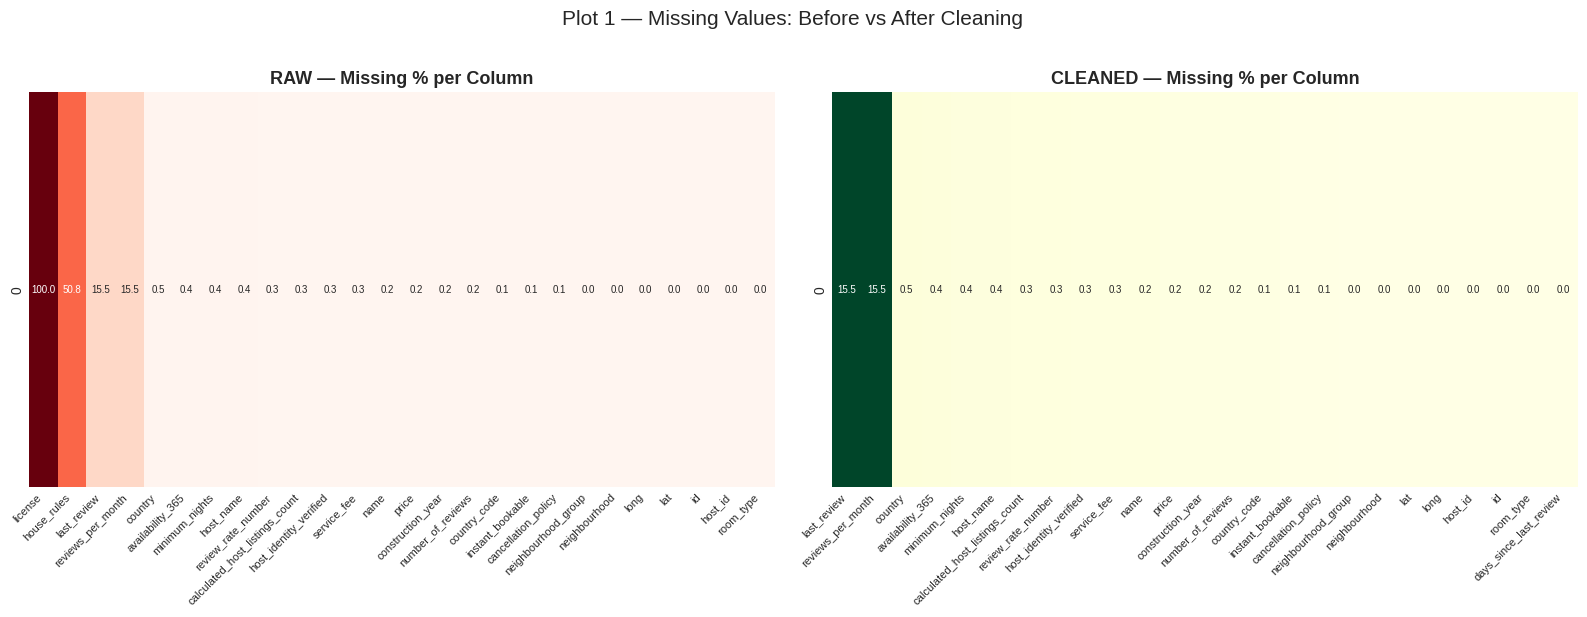

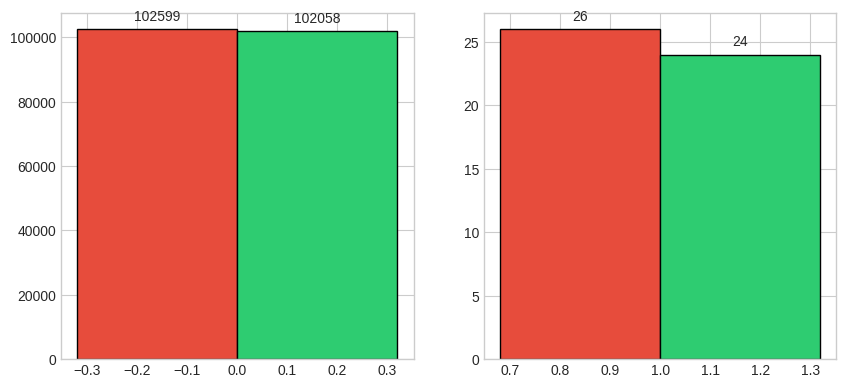

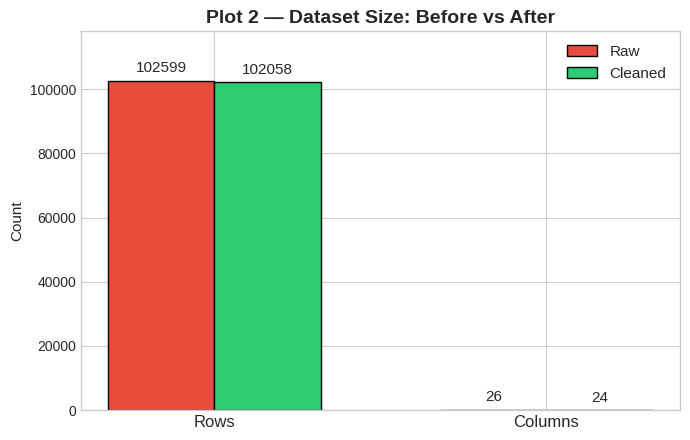

/tmp/ipython-input-4291051496.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipython-input-4291051496.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipython-input-4291051496.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipython-input-4291051496.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


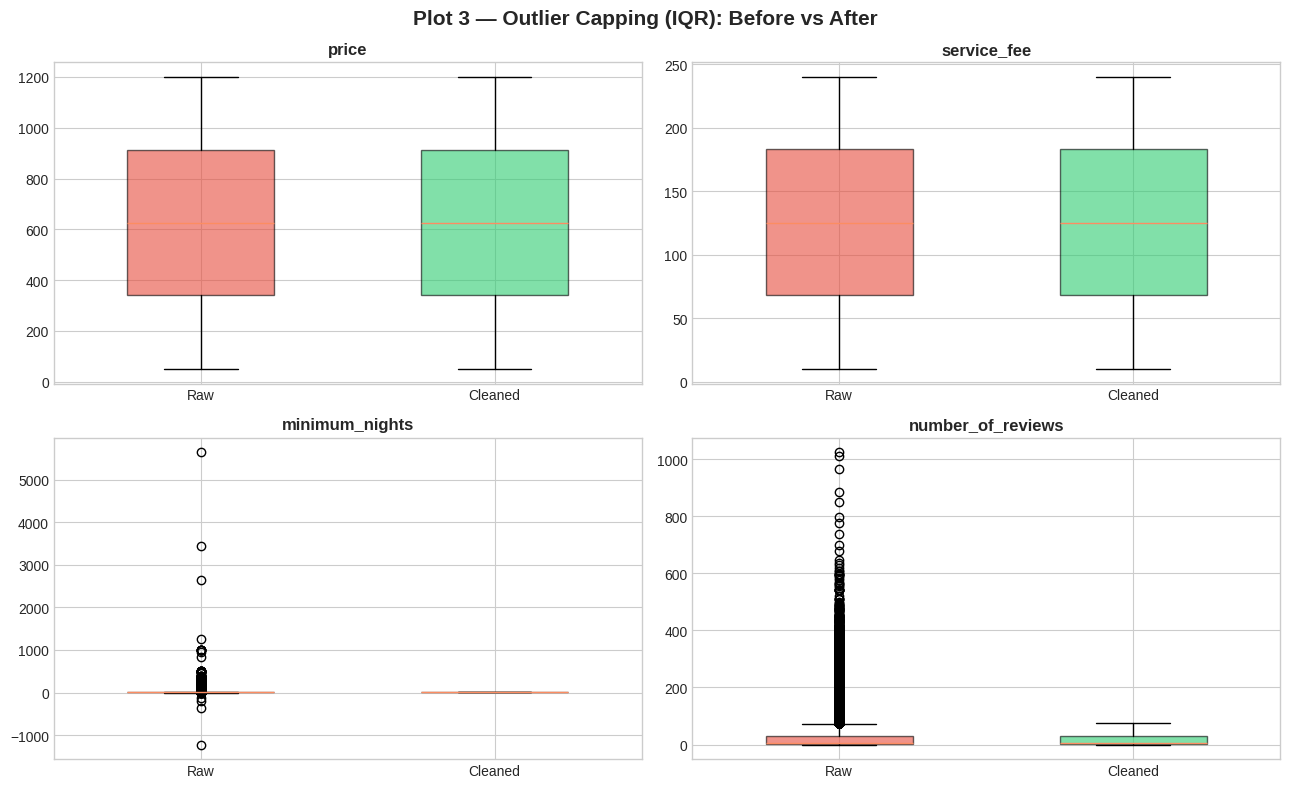

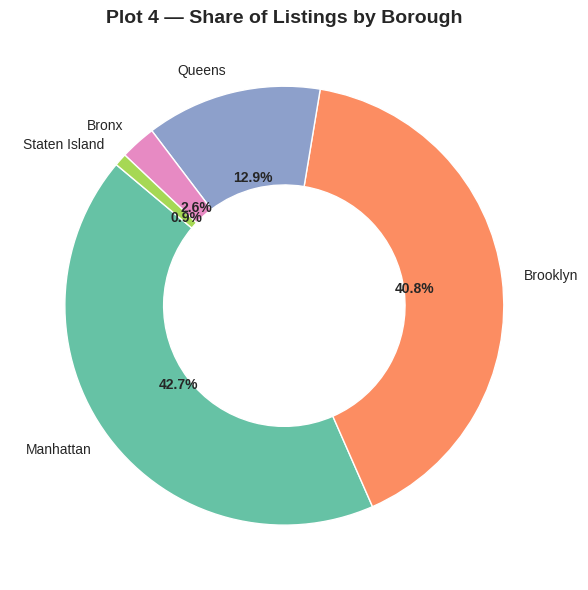

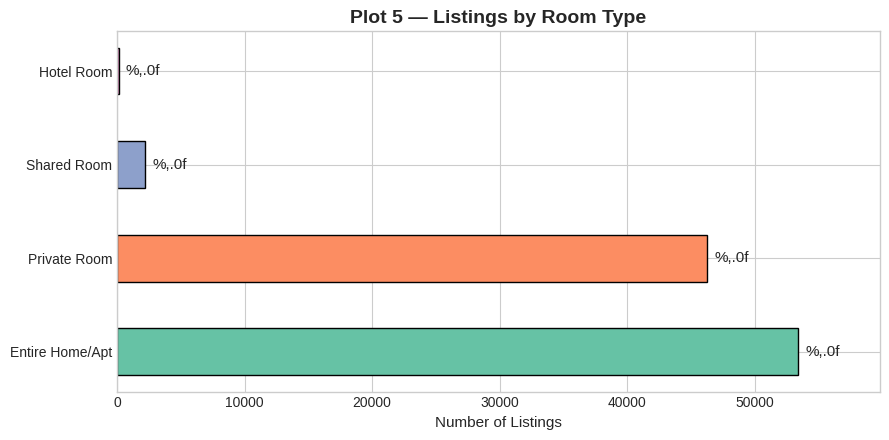

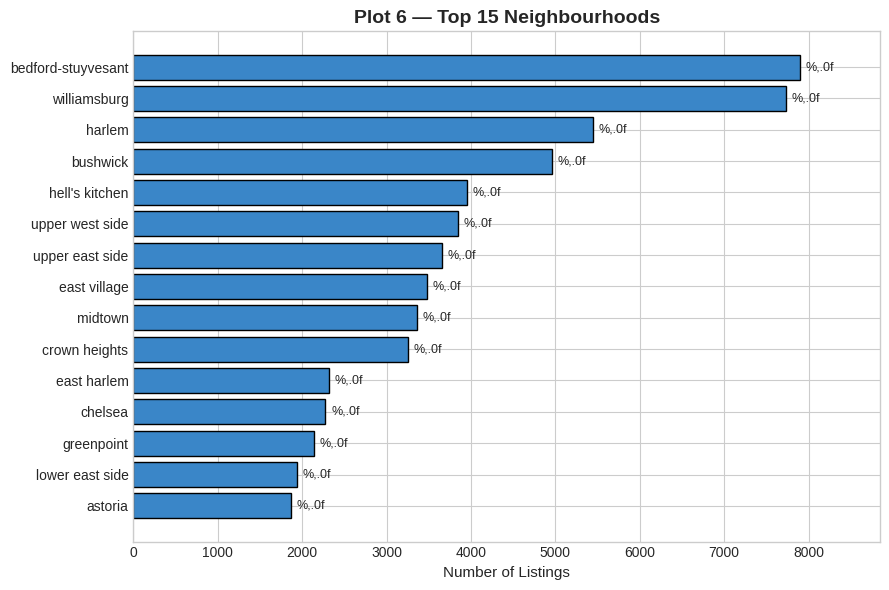

/tmp/ipython-input-4291051496.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4291051496.py:199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([t.get_text().title() for t in ax.get_xticklabels()], fontsize=10)


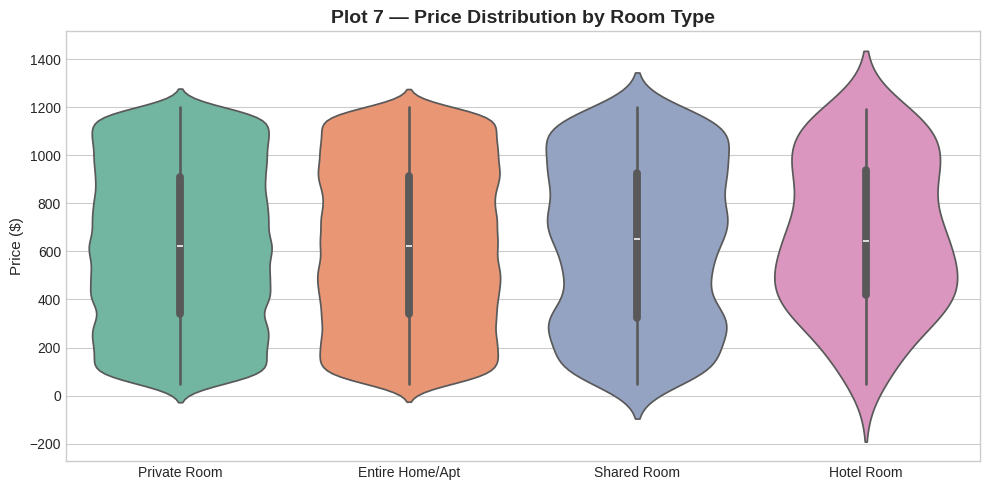

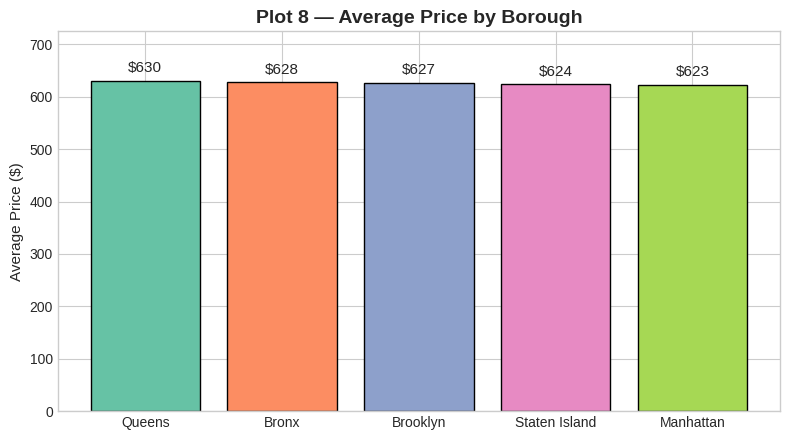

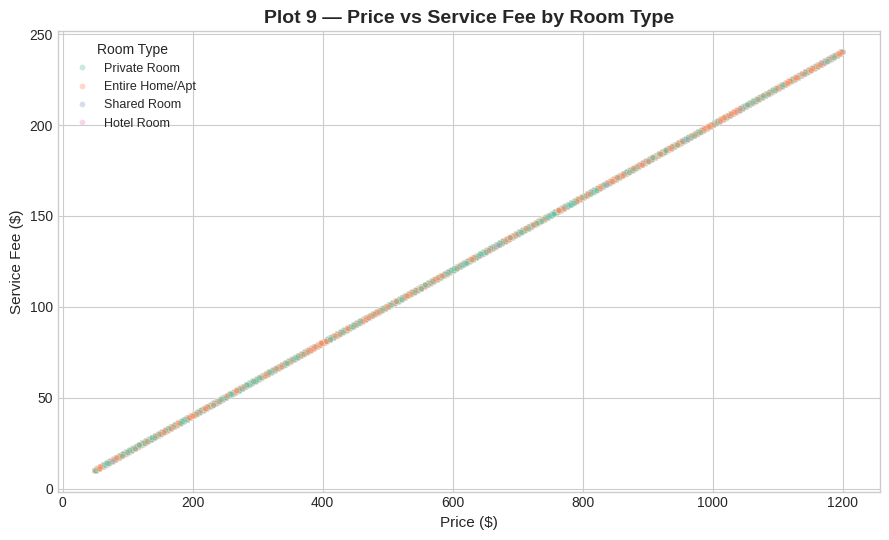

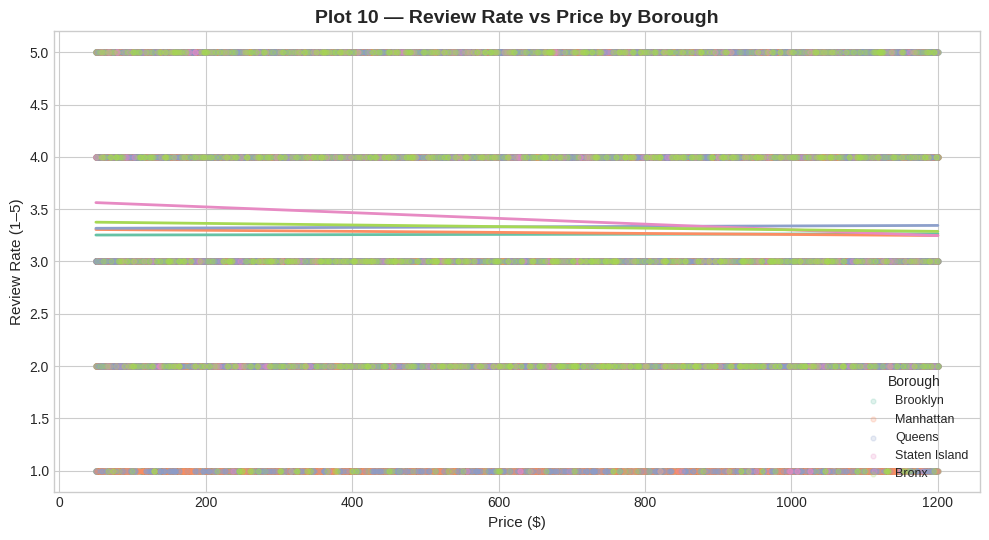

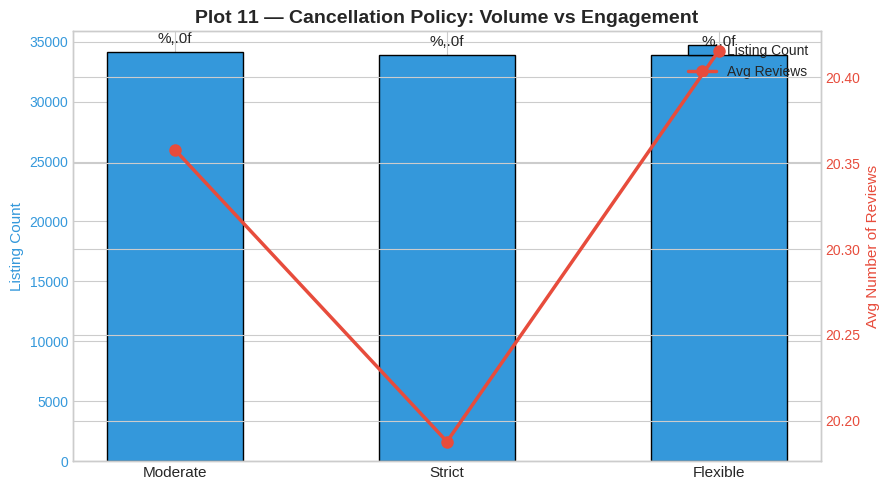

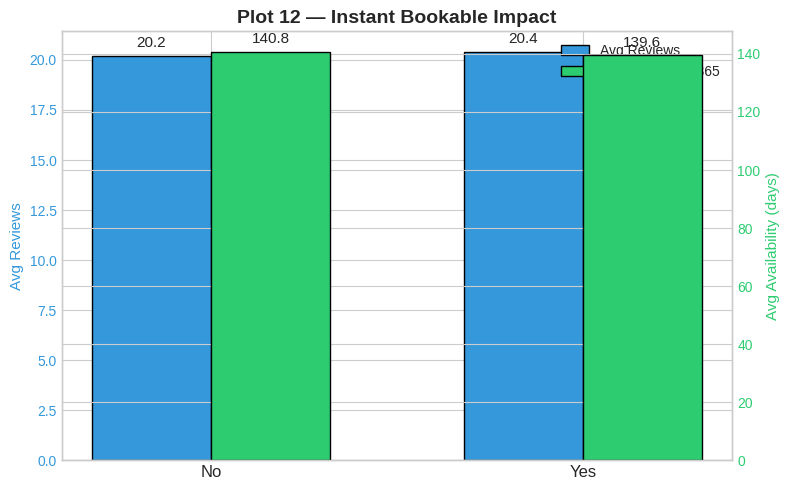

/tmp/ipython-input-4291051496.py:363: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ver_df, x="verified", y="price",
/tmp/ipython-input-4291051496.py:370: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ver_df, x="verified", y="number_of_reviews",


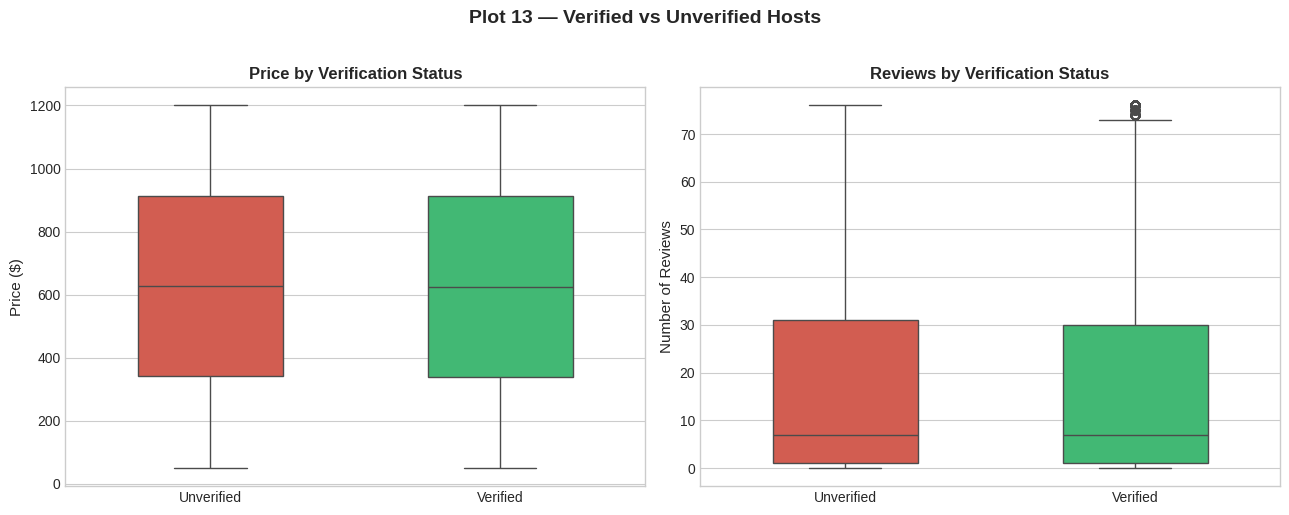

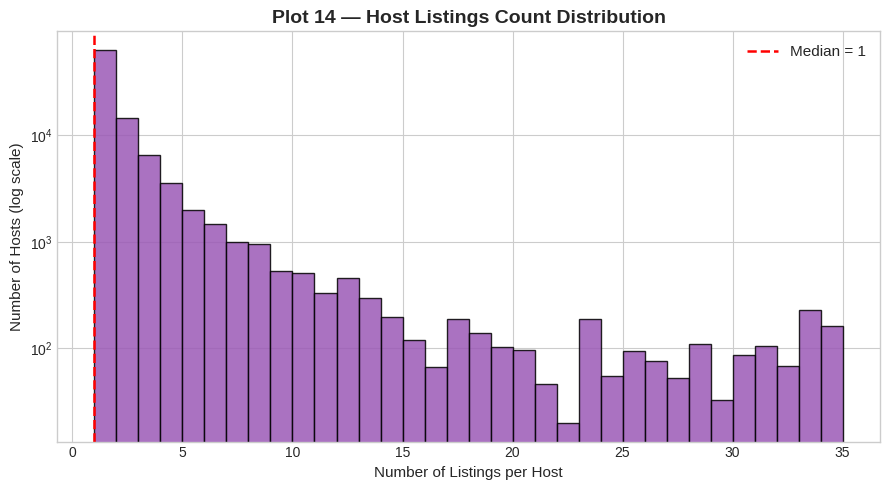

/tmp/ipython-input-4291051496.py:406: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-4291051496.py:410: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


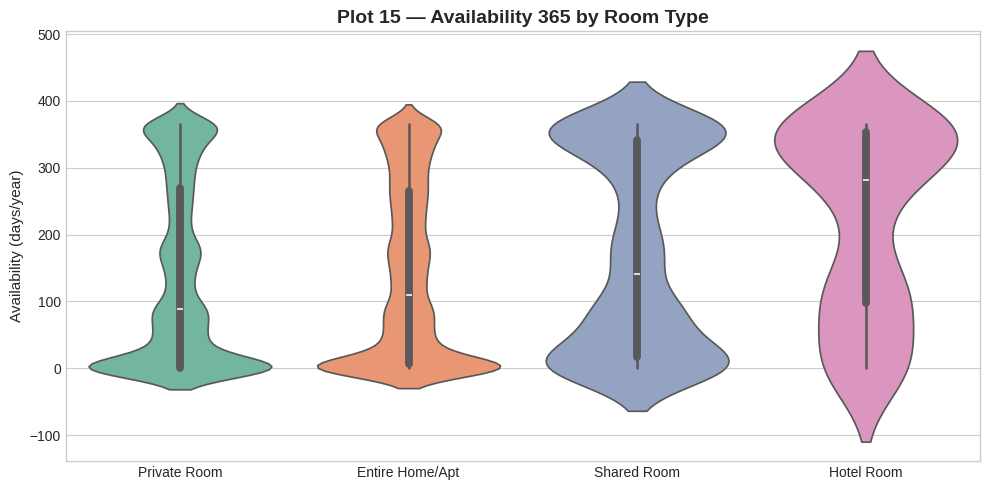

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA
df = pd.read_csv("/content/airbnb_cleaned.csv")

raw_df = pd.read_csv("/content/Airbnb_Open_Data.csv", low_memory=False)
raw_df.columns = raw_df.columns.str.strip().str.lower().str.replace(" ", "_")

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

#  PLOT 1 — Missing Values Heatmap: Before vs After
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Raw missing %
raw_missing = (raw_df.isna().sum() / len(raw_df) * 100).sort_values(ascending=False)
sns.heatmap(
    raw_missing.to_frame().T,
    annot=True, fmt=".1f", cmap="Reds",
    ax=axes[0], cbar=False, annot_kws={"size": 7}
)
axes[0].set_title("RAW — Missing % per Column", fontsize=13, fontweight="bold")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right", fontsize=8)

# Cleaned missing %
clean_missing = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
sns.heatmap(
    clean_missing.to_frame().T,
    annot=True, fmt=".1f", cmap="YlGn",
    ax=axes[1], cbar=False, annot_kws={"size": 7}
)
axes[1].set_title("CLEANED — Missing % per Column", fontsize=13, fontweight="bold")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.suptitle("Plot 1 — Missing Values: Before vs After Cleaning", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


#  PLOT 2 — Dataset Size: Before vs After (Rows & Columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

categories = ["Rows", "Columns"]
before = [102599, 26]
after  = [102058, 24]
x = np.arange(len(categories))
w = 0.32

for i, (ax, idx) in enumerate(zip(axes, [0, 1])):
    bars_before = ax.bar(x[idx] - w / 2, before[idx], w, label="Raw",     color="#e74c3c", edgecolor="black")
    bars_after  = ax.bar(x[idx] + w / 2, after[idx],  w, label="Cleaned", color="#2ecc71", edgecolor="black")
    ax.bar_label(bars_before, padding=4, fontsize=10)
    ax.bar_label(bars_after,  padding=4, fontsize=10)

# single grouped bar chart instead
fig, ax = plt.subplots(figsize=(7, 4.5))
bars_b = ax.bar(x - w / 2, before, w, label="Raw",     color="#e74c3c", edgecolor="black")
bars_a = ax.bar(x + w / 2, after,  w, label="Cleaned", color="#2ecc71", edgecolor="black")
ax.bar_label(bars_b, padding=4, fontsize=11)
ax.bar_label(bars_a, padding=4, fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylabel("Count", fontsize=11)
ax.set_title("Plot 2 — Dataset Size: Before vs After", fontsize=14, fontweight="bold")
ax.legend(fontsize=11)
ax.set_ylim(0, max(before) * 1.15)
plt.tight_layout()
plt.show()


#  PLOT 3 — Outlier Distributions: Before vs After IQR Capping

# Prepare raw versions of the 4 capped columns
raw_df["price"] = (
    raw_df["price"].astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
raw_df["price"] = pd.to_numeric(raw_df["price"], errors="coerce")

raw_df["service_fee"] = (
    raw_df["service_fee"].astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
raw_df["service_fee"] = pd.to_numeric(raw_df["service_fee"], errors="coerce")

cols_iqr = ["price", "service_fee", "minimum_nights", "number_of_reviews"]

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
axes = axes.flatten()

for i, col in enumerate(cols_iqr):
    ax = axes[i]
    data_raw   = raw_df[col].dropna()
    data_clean = df[col].dropna()

    bp = ax.boxplot(
        [data_raw, data_clean],
        labels=["Raw", "Cleaned"],
        patch_artist=True,
        widths=0.5
    )
    bp["boxes"][0].set_facecolor("#e74c3c")
    bp["boxes"][1].set_facecolor("#2ecc71")
    bp["boxes"][0].set_alpha(0.6)
    bp["boxes"][1].set_alpha(0.6)

    ax.set_title(col, fontsize=12, fontweight="bold")
    ax.tick_params(labelsize=10)

plt.suptitle("Plot 3 — Outlier Capping (IQR): Before vs After", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

#  PLOT 4 — Listings by Neighbourhood Group (Donut)
counts = df["neighbourhood_group"].value_counts().dropna()

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index.str.title(),
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Set2", len(counts)),
    wedgeprops=dict(width=0.45, edgecolor="white")
)
for txt in autotexts:
    txt.set_fontsize(10)
    txt.set_fontweight("bold")
ax.set_title("Plot 4 — Share of Listings by Borough", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

#  PLOT 5 — Listings by Room Type (Horizontal Bar)
counts = df["room_type"].value_counts().dropna()

fig, ax = plt.subplots(figsize=(9, 4.5))
bars = ax.barh(
    counts.index.str.title(),
    counts.values,
    color=sns.color_palette("Set2", len(counts)),
    edgecolor="black", height=0.5
)
ax.bar_label(bars, padding=5, fontsize=11, fmt="%,.0f")
ax.set_xlabel("Number of Listings", fontsize=11)
ax.set_title("Plot 5 — Listings by Room Type", fontsize=14, fontweight="bold")
ax.set_xlim(0, counts.max() * 1.12)
plt.tight_layout()
plt.show()

#  PLOT 6 — Top 15 Neighbourhoods by Listing Count
top15 = df["neighbourhood"].value_counts().dropna().head(15)

fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.barh(
    top15.index[::-1],          # reverse so #1 is on top
    top15.values[::-1],
    color="#3a86c8", edgecolor="black"
)
ax.bar_label(bars, padding=4, fontsize=9, fmt="%,.0f")
ax.set_xlabel("Number of Listings", fontsize=11)
ax.set_title("Plot 6 — Top 15 Neighbourhoods", fontsize=14, fontweight="bold")
ax.set_xlim(0, top15.max() * 1.12)
plt.tight_layout()
plt.show()

#  PLOT 7 — Price Distribution by Room Type (Violin)

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(
    data=df.dropna(subset=["price", "room_type"]),
    x="room_type", y="price",
    palette="Set2", ax=ax, inner="box"
)
ax.set_xticklabels([t.get_text().title() for t in ax.get_xticklabels()], fontsize=10)
ax.set_xlabel("")
ax.set_ylabel("Price ($)", fontsize=11)
ax.set_title("Plot 7 — Price Distribution by Room Type", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

#  PLOT 8 — Average Price by Neighbourhood Group (Bar)

avg_price = (
    df.groupby("neighbourhood_group")["price"]
    .mean()
    .sort_values(ascending=False)
    .dropna()
)

fig, ax = plt.subplots(figsize=(8, 4.5))
bars = ax.bar(
    avg_price.index.str.title(),
    avg_price.values,
    color=sns.color_palette("Set2", len(avg_price)),
    edgecolor="black"
)
ax.bar_label(bars, fmt="$%.0f", padding=4, fontsize=11)
ax.set_ylabel("Average Price ($)", fontsize=11)
ax.set_title("Plot 8 — Average Price by Borough", fontsize=14, fontweight="bold")
ax.set_ylim(0, avg_price.max() * 1.15)
plt.tight_layout()
plt.show()

#  PLOT 9 — Price vs Service Fee (Scatter, coloured by Room Type)
plot9_df = df.dropna(subset=["price", "service_fee", "room_type"]).copy()
plot9_df["room_type"] = plot9_df["room_type"].str.title()

fig, ax = plt.subplots(figsize=(9, 5.5))
sns.scatterplot(
    data=plot9_df, x="price", y="service_fee",
    hue="room_type", alpha=0.35, s=18, ax=ax, palette="Set2"
)
ax.set_xlabel("Price ($)", fontsize=11)
ax.set_ylabel("Service Fee ($)", fontsize=11)
ax.set_title("Plot 9 — Price vs Service Fee by Room Type", fontsize=14, fontweight="bold")
ax.legend(title="Room Type", fontsize=9)
plt.tight_layout()
plt.show()

#  PLOT 10 — Review Rate vs Price (Scatter + Trend, by Borough)
plot10_df = df.dropna(subset=["price", "review_rate_number", "neighbourhood_group"]).copy()
plot10_df["neighbourhood_group"] = plot10_df["neighbourhood_group"].str.title()

fig, ax = plt.subplots(figsize=(10, 5.5))
for i, grp in enumerate(plot10_df["neighbourhood_group"].unique()):
    subset = plot10_df[plot10_df["neighbourhood_group"] == grp]
    color  = sns.color_palette("Set2")[i]
    ax.scatter(subset["price"], subset["review_rate_number"],
               alpha=0.2, s=12, color=color, label=grp)
    # Trend line
    z = np.polyfit(subset["price"], subset["review_rate_number"], 1)
    p = np.poly1d(z)
    x_line = np.linspace(subset["price"].min(), subset["price"].max(), 100)
    ax.plot(x_line, p(x_line), color=color, linewidth=2)

ax.set_xlabel("Price ($)", fontsize=11)
ax.set_ylabel("Review Rate (1–5)", fontsize=11)
ax.set_title("Plot 10 — Review Rate vs Price by Borough", fontsize=14, fontweight="bold")
ax.legend(title="Borough", fontsize=9)
plt.tight_layout()
plt.show()

#  PLOT 11 — Cancellation Policy: Listing Count + Avg Reviews

cancel_df = df.dropna(subset=["cancellation_policy"]).copy()
cancel_df["cancellation_policy"] = cancel_df["cancellation_policy"].str.title()

policy_counts  = cancel_df["cancellation_policy"].value_counts()
policy_avg_rev = cancel_df.groupby("cancellation_policy")["number_of_reviews"].mean()

order = policy_counts.index.tolist()
policy_avg_rev = policy_avg_rev.reindex(order)

fig, ax1 = plt.subplots(figsize=(9, 5))
x = np.arange(len(order))
w = 0.5

bars = ax1.bar(x, policy_counts.values, w, color="#3498db", edgecolor="black", label="Listing Count")
ax1.bar_label(bars, fmt="%,.0f", padding=4, fontsize=11)
ax1.set_ylabel("Listing Count", fontsize=11, color="#3498db")
ax1.set_xticks(x)
ax1.set_xticklabels(order, fontsize=11)
ax1.tick_params(axis="y", labelcolor="#3498db")

ax2 = ax1.twinx()
ax2.plot(x, policy_avg_rev.values, color="#e74c3c", marker="o", linewidth=2.5,
         markersize=8, label="Avg Reviews", zorder=5)
ax2.set_ylabel("Avg Number of Reviews", fontsize=11, color="#e74c3c")
ax2.tick_params(axis="y", labelcolor="#e74c3c")

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)

ax1.set_title("Plot 11 — Cancellation Policy: Volume vs Engagement", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

#  PLOT 12 — Instant Bookable: Avg Reviews & Avg Availability
ib_df = df.dropna(subset=["instant_bookable"]).copy()
ib_df["instant_bookable_label"] = ib_df["instant_bookable"].map({0: "No", 1: "Yes"})

grp = (
    ib_df.groupby("instant_bookable_label")
    .agg(avg_reviews=("number_of_reviews", "mean"),
         avg_avail=("availability_365", "mean"))
    .reindex(["No", "Yes"])
)

fig, ax1 = plt.subplots(figsize=(8, 5))
x = np.arange(len(grp))
w = 0.32

bars1 = ax1.bar(x - w / 2, grp["avg_reviews"], w, color="#3498db", edgecolor="black", label="Avg Reviews")
ax1.bar_label(bars1, fmt="%.1f", padding=4, fontsize=11)
ax1.set_ylabel("Avg Reviews", fontsize=11, color="#3498db")
ax1.set_xticks(x)
ax1.set_xticklabels(grp.index, fontsize=12)
ax1.tick_params(axis="y", labelcolor="#3498db")

ax2 = ax1.twinx()
bars2 = ax2.bar(x + w / 2, grp["avg_avail"], w, color="#2ecc71", edgecolor="black", label="Avg Availability 365")
ax2.bar_label(bars2, fmt="%.1f", padding=4, fontsize=11)
ax2.set_ylabel("Avg Availability (days)", fontsize=11, color="#2ecc71")
ax2.tick_params(axis="y", labelcolor="#2ecc71")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=10)

ax1.set_title("Plot 12 — Instant Bookable Impact", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

#  PLOT 13 — Verified vs Unverified Hosts: Price & Reviews
ver_df = df.dropna(subset=["host_identity_verified"]).copy()
ver_df["verified"] = ver_df["host_identity_verified"].map({1: "Verified", 0: "Unverified"})

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.boxplot(data=ver_df, x="verified", y="price",
            palette={"Verified": "#2ecc71", "Unverified": "#e74c3c"},
            ax=axes[0], width=0.5)
axes[0].set_title("Price by Verification Status", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Price ($)", fontsize=11)
axes[0].set_xlabel("")

sns.boxplot(data=ver_df, x="verified", y="number_of_reviews",
            palette={"Verified": "#2ecc71", "Unverified": "#e74c3c"},
            ax=axes[1], width=0.5)
axes[1].set_title("Reviews by Verification Status", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Number of Reviews", fontsize=11)
axes[1].set_xlabel("")

plt.suptitle("Plot 13 — Verified vs Unverified Hosts", fontsize=14, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

#  PLOT 14 — Host Listings Count Distribution (Log Scale)

host_counts = df["calculated_host_listings_count"].dropna()

fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(host_counts, bins=range(1, 36), color="#9b59b6", edgecolor="black", alpha=0.85)
ax.set_yscale("log")
ax.set_xlabel("Number of Listings per Host", fontsize=11)
ax.set_ylabel("Number of Hosts (log scale)", fontsize=11)
ax.set_title("Plot 14 — Host Listings Count Distribution", fontsize=14, fontweight="bold")
ax.axvline(host_counts.median(), color="red", linestyle="--", linewidth=1.8, label=f"Median = {host_counts.median():.0f}")
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

#  PLOT 15 — Availability 365 by Room Type (Violin)

avail_df = df.dropna(subset=["availability_365", "room_type"]).copy()
avail_df["room_type"] = avail_df["room_type"].str.title()

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(
    data=avail_df, x="room_type", y="availability_365",
    palette="Set2", ax=ax, inner="box"
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_xlabel("")
ax.set_ylabel("Availability (days/year)", fontsize=11)
ax.set_title("Plot 15 — Availability 365 by Room Type", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()